In [38]:

'''
id - a unique identifier for each trip
vendor_id - a code indicating the provider associated with the trip record
pickup_datetime - date and time when the meter was engaged
dropoff_datetime - date and time when the meter was disengaged
passenger_count - the number of passengers in the vehicle (driver entered value)
pickup_longitude - the longitude where the meter was engaged
pickup_latitude - the latitude where the meter was engaged
dropoff_longitude - the longitude where the meter was disengaged
dropoff_latitude - the latitude where the meter was disengaged
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
trip_duration - duration of the trip in seconds
'''
%matplotlib inline
import pandas as pd



import numpy as np
train_df = pd.read_csv("./nyc-taxi-trip-duration/train.csv")
test_df = pd.read_csv("./nyc-taxi-trip-duration/test.csv")

# step1 data show 

In [2]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [3]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [4]:
train_df["trip_duration_log"]=np.log(train_df['trip_duration'].values)

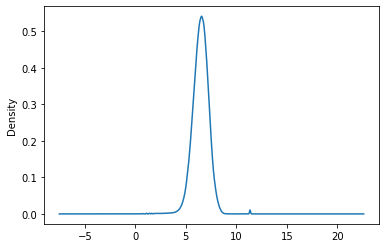

In [5]:
train_df["trip_duration_log"].plot(kind="kde")

In [6]:
train_df["trip_duration"] = train_df["trip_duration_log"] 

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  float64
 11  trip_duration_log   1458644 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 133.5+ MB


## easy to see the date have lot of Latitude and longitude data  and timedata ，We can convert latitude and longitude data into distance and time data can be separated

# stpe2 compute distance between two points (latitude and longitude)

In [8]:

from math import radians, cos, sin, asin, sqrt

In [9]:
def geodistance(x):
    '''
    Convert latitude and longitude to distance
    '''
    lng1, lat1, lng2, lat2=x["pickup_longitude"],x["pickup_latitude"],x["dropoff_longitude"],x["dropoff_latitude"]
    lng1, lat1, lng2, lat2 = map(radians, [float(lng1), float(lat1), float(lng2), float(lat2)]) # 经纬度转换成弧度
    dlon=lng2-lng1
    dlat=lat2-lat1
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    distance=2*asin(sqrt(a))*6371*1000 # 地球平均半径，6371km
    distance=round(distance/1000,3)
    return distance

In [10]:

train_df["Distance"] = train_df.apply(geodistance,axis=1)
test_df["Distance"] = test_df.apply(geodistance,axis=1)

In [11]:
train_df.describe()["Distance"]

count    1.458644e+06
mean     3.440864e+00
std      4.296538e+00
min      0.000000e+00
25%      1.232000e+00
50%      2.094000e+00
75%      3.875000e+00
max      1.240909e+03
Name: Distance, dtype: float64

In [12]:
# train_df = train_df[
#     (train_df["Distance"]<train_df.describe()["Distance"]["75%"])&(train_df["Distance"]>train_df.describe()["Distance"]["25%"])
#         ]

In [13]:
# train_df["Distance"].plot(kind="hist")

In [14]:
train_df["store_and_fwd_flag"].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

/Users/soliva/software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


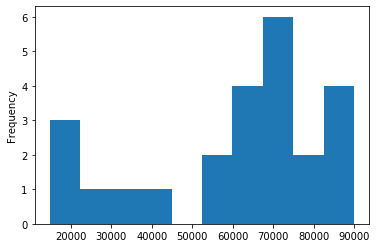

In [59]:
train_df['pickup_datetime'] = pd.to_datetime(train_df['pickup_datetime'])
test_df['pickup_datetime'] = pd.to_datetime(test_df['pickup_datetime'])
train_df.groupby([train_df['pickup_datetime'].dt.hour]).id.count().plot(kind="hist")

# step3 Observe the change in duration of the peak period

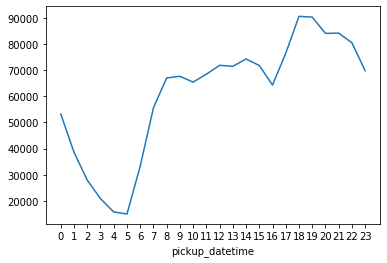

In [16]:
train_df.groupby([train_df['pickup_datetime'].dt.hour]).id.count().plot(xticks=list(range(0,24)))

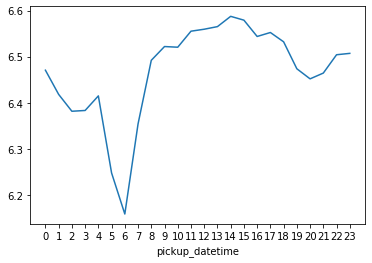

In [17]:
train_df.groupby([train_df['pickup_datetime'].dt.hour]).trip_duration.median().plot(xticks=list(range(0,24)))

### We fuzzy set the cutoff of time 0-6, 6-14, 14-20, 20-0

In [18]:
def Classification(x):
#     print(x['pickup_datetime'].hour)
    if x['pickup_datetime'].hour>=0 & x['pickup_datetime'].hour<6:
        return 1
    elif x['pickup_datetime'].hour>=6 & x['pickup_datetime'].hour<14:
        return 1
    elif x['pickup_datetime'].hour>=14 & x['pickup_datetime'].hour<20:
        return 1
    elif x['pickup_datetime'].hour>=20 & x['pickup_datetime'].hour<0:
        return 1
    else:
        return 0
train_df["rush_hours"]=train_df.apply(Classification,axis=1)
test_df["rush_hours"] = test_df.apply(Classification,axis=1)



In [19]:
y_train = train_df["trip_duration"]
x_train = train_df[["vendor_id", "passenger_count","Distance","rush_hours" ]]

In [20]:
x_train.head()

,vendor_id,passenger_count,Distance,rush_hours
0,2,1,1.499,1
1,1,1,1.806,1
2,2,1,6.385,1
3,2,1,1.485,1
4,2,1,1.189,1


In [21]:
y_train

0          6.120297
1          6.496775
2          7.661056
3          6.061457
4          6.075346
             ...   
1458639    6.656727
1458640    6.484635
1458641    6.638568
1458642    5.921578
1458643    5.288267
Name: trip_duration, Length: 1458644, dtype: float64

# split train data test MSE 

In [25]:
from sklearn.model_selection import train_test_split
x_trains,x_tests,y_trains,y_tests = train_test_split(x_train,y_train,random_state=41)
lr = LinearRegression()
lr.fit(x_trains, y_trains)

result = lr.predict(x_tests)


In [26]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_tests, result))

NameError: name 'mean_squared_error' is not defined

# used real test data run model

In [ ]:
import matplotlib.pyplot as plt


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
ridge = Ridge(alpha = .5)
lr = LinearRegression()
lasso = Lasso(alpha = 0.1)
print(cross_val_score(ridge, x_train, y_train, cv=10))
print(cross_val_score(lr, x_train, y_train, cv=10))
print(cross_val_score(lasso, x_train, y_train, cv=10))

[0.37318153 0.16308005 0.32886367 0.37686277 0.36494144 0.37732754
 0.16490966 0.33412538 0.37659743 0.37481387]
[0.37318154 0.16308004 0.32886367 0.37686277 0.36494145 0.37732754
 0.16490966 0.33412538 0.37659743 0.37481387]
[0.36713898 0.17978066 0.32725071 0.37035386 0.35935609 0.37086808
 0.18176693 0.33189538 0.37026114 0.36837173]


In [ ]:
y_train

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

x_test = test_df[["vendor_id","passenger_count",
                     "Distance", 
                     "rush_hours" ]]
result = lr.predict(x_test)
result

In [31]:
train_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_log,Distance,rush_hours
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,6.120297,6.120297,1.499,1
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,6.496775,6.496775,1.806,1
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661056,7.661056,6.385,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,6.061457,6.061457,1.485,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,6.075346,6.075346,1.189,1


In [ ]:
update_file = pd.read_csv('./nyc-taxi-trip-duration/sample_submission.csv')
update_file['trip_duration'] = np.exp(result)
update_file.to_csv('submission.csv', index=False)

In [ ]:
lr.score(x_test, result)

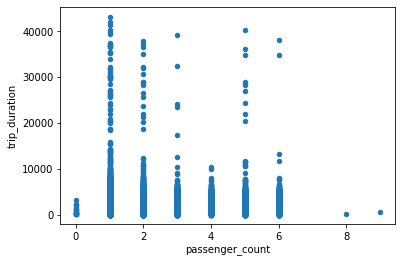

In [57]:
train_df.plot(x="passenger_count",y="trip_duration",kind="scatter")

In [56]:
train_df= train_df[-((train_df.trip_duration>43200) | (train_df.trip_duration<60))]

In [45]:
train_df.trip_duration.value_counts()

368      1624
408      1584
348      1582
367      1581
358      1577
         ... 
85305       1
83256       1
83884       1
6419        1
8522        1
Name: trip_duration, Length: 7417, dtype: int64

In [62]:
train_df[train_df['pickup_datetime'].dt.dayofweek>5]


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
11,id1299289,2,2016-05-15 11:16:11,2016-05-15 11:34:59,4,-73.991531,40.749439,-73.956543,40.770630,N,1128
19,id3390316,2,2016-06-05 13:47:23,2016-06-05 13:51:34,1,-73.983887,40.738197,-73.991203,40.727871,N,251
20,id2070428,1,2016-02-28 02:23:02,2016-02-28 02:31:08,1,-73.980370,40.742420,-73.962852,40.760635,N,486
25,id0129640,2,2016-02-14 13:27:56,2016-02-14 13:49:19,1,-73.956581,40.771358,-73.974968,40.732792,N,1283
...,...,...,...,...,...,...,...,...,...,...,...
1458626,id0155863,2,2016-01-17 17:21:11,2016-01-17 17:25:15,2,-73.954071,40.767021,-73.950340,40.778233,N,244
1458632,id0469946,2,2016-03-06 11:04:48,2016-03-06 11:17:45,2,-74.015572,40.710892,-73.996620,40.743633,N,777
1458634,id3445276,1,2016-04-03 13:51:25,2016-04-03 14:07:37,2,-73.989075,40.730465,-73.963882,40.773739,N,972
1458637,id1920898,1,2016-04-17 18:48:16,2016-04-17 19:00:56,1,-73.975357,40.751705,-73.949478,40.776764,N,760


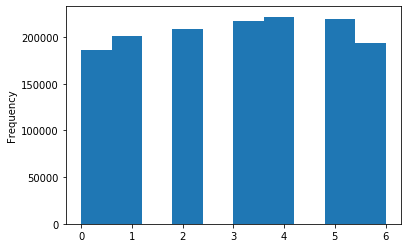

In [73]:
train_df['pickup_datetime'].dt.dayofweek.plot(kind="hist")

In [77]:
def MAE(x):
    if x.hour>0 & x.hour<6:
        return 0 
    else:
        return 1
    
train_df["MAE"]=train_df.pickup_datetime.apply(MAE)

In [78]:
train_df["MAE"]

0          0
1          1
2          0
3          0
4          0
          ..
1458639    0
1458640    0
1458641    0
1458642    0
1458643    0
Name: MAE, Length: 1448056, dtype: int64